# PyTorch로 시작하는 딥러닝 입문
## 5. 인공 신경망

### 머신 러닝 용어 이해하기
#### 머신 러닝 모델의 평가
실제 모델을 평가하기 위해서 데이터를 훈련용, 검증용, 테스트용 세 가지로 분리 함  
검증용 데이터는 하이퍼파라미터를 조정하기 위한 용도

#### 분류와 회귀
분류 문제
- 이진 분류
- 다중 분류

회귀 문제



#### 머신 러닝의 종류
- 지도 학습
- 비지도 학습
- 강화 학습

#### 샘플과 특성
많은 머신 러닝은 1개 이상의 독립 변수 $x$로 종속 변수 $y$를 예측  
이때 데이터를 행렬로 많이 표현하는데  
행렬의 행은 샘플  
행렬의 열은 특성

#### 혼돈 행렬
|-|참|거짓|
|------|---|---|
|참|TP|FN|
|거짓|FP|TN|

1. 정밀도(Precision) : 정말로 참이라고 대답한 전체 케이스에 대한 TP 비율
> ${TP}\over{TP+FP}$

2. 재현률(Recall) : 실제 값이 참인 데이터의 전체 개수에 대해서 TP 비율
> ${TP}\over{TP+FN}$

#### 과적합 과소 적합
과적합 : 훈련 데이터를 과하게 학습한 경우  
과소 적합 : 훈련 자체가 부족한 상태

### 퍼셉트론

#### 단층 퍼셉트론
값을 입력 받아 보내는 단계와 이를 출력하는 두 단계로 이루어진 퍼셉트론으로  
입력층과 출력층만 존재



AND 게이트  
두 개의 입력 값이 모두 1인 경우에만 출력 값이 1  

$x_1$|$x_2$|$y$|
---|---|---|
0|0|0
0|1|0
1|0|0
1|1|1




In [ ]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

NAND 게이트  
두 개의 입력 값이 모두 1인 경우에만 출력 값이 0  

$x_1$|$x_2$|$y$|
---|---|---|
0|0|1
0|1|1
1|0|1
1|1|0

In [ ]:
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

OR 게이트  
두 개의 입력이 모두 0인 경우에 출력값이 0이고 나머지 경우에는 모두 출력값이 1  

$x_1$|$x_2$|$y$|
---|---|---|
0|0|0
0|1|1
1|0|1
1|1|1

In [ ]:
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

#### 다층 퍼셉트론
입력층과 출력층 사이에 은닉층이 존재하는 퍼셉트론  
은닉층이 2개 이상인 신경망을 심층 신경망이라 부름  



### XOR 문제 - 단층 퍼셉트론 구현하기


XOR 게이트  
입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0  

$x_1$|$x_2$|$y$|
---|---|---|
0|0|0
0|1|1
1|0|1
1|1|0

#### 파이토치로 단층 퍼셉트론 구현하기

In [ ]:

import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [ ]:
criterion = nn.BCELoss().to(device) # Binary Crossentropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.6931471824645996
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

#### 학습된 단층 퍼셉트론의 예측값 확인하기

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


실제값은 (0, 1, 1, 0) 이지만  
예측값은 (0, 0, 0, 0)로 문제를 잘 풀지 못함



### 역전파


#### 인공 신경망의 이해
인공 신경망은 입력층, 은닉층, 출력층 이렇게 3개의 층을 가짐  

#### 순전파
입력층으로부터 출력층 방향으로 결과값을 도출하는 과정

#### 역전파
출력층으로부터 입력층 방향으로 가중치를 업데이트 하는 과정

### XOR 문제 - 다층 퍼셉트론 구현하기


#### 파이토치로 다층 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 10, bias = True) ,# input_layer = 2, hidden_layer = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid(),
).to(device)

In [ ]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for epoch in range(10001):
    optimizer.zero_grad()
    
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.7148227691650391
100 0.6931203007698059
200 0.6931170225143433
300 0.6931133270263672
400 0.6931092143058777
500 0.6931045651435852
600 0.6930993795394897
700 0.6930932998657227
800 0.6930864453315735
900 0.6930785179138184
1000 0.6930690407752991
1100 0.6930578947067261
1200 0.6930445432662964
1300 0.6930283308029175
1400 0.693008542060852
1500 0.6929835677146912
1600 0.6929517984390259
1700 0.6929104328155518
1800 0.6928553581237793
1900 0.6927794814109802
2000 0.6926714181900024
2100 0.6925103664398193
2200 0.6922566890716553
2300 0.6918262839317322
2400 0.6910179257392883
2500 0.689247727394104
2600 0.6842005848884583
2700 0.6603636741638184
2800 0.5446934700012207
2900 0.5171388983726501
3000 0.019469168037176132
3100 0.007341952994465828
3200 0.004329528193920851
3300 0.003015378024429083
3400 0.0022915173321962357
3500 0.0018374095670878887
3600 0.0015277580823749304
3700 0.0013039649929851294
3800 0.0011350905988365412
3900 0.001003445591777563
4000 0.0008981125429272652
41

#### 학습된 다층 퍼셉트론의 예측값 확인하기

In [ ]:
with torch.no_grad():
    hypothesis = model(X)

    predicted  = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[9.7788950e-05]
 [9.9988198e-01]
 [9.9987924e-01]
 [1.0944448e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


실제값, 예측값 모두 (0, 1, 1, 0) 


### 비선형 활성화 함수

#### 활성화 함수의 특징 - 비선형 함수
선형 함수란 출력이 입력의 상수배만큼 변하는 함수이며 직선 그래프  
비선형 함수란 선형 함수가 아닌 함수들  

#### 시그모이드 함수와 기울기 소실

은닉층에선 잘 사용하지 않지만 이진 분류 문제에서 출력층으로 쓰임  

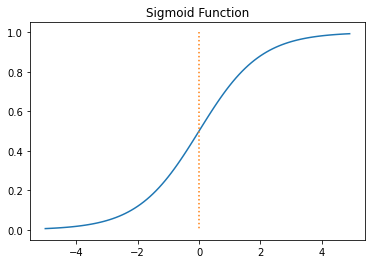

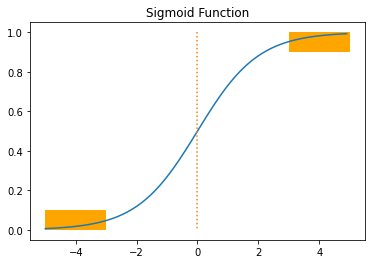

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot([0,0],[1.0,0.0], ':')
ax.set_title('Sigmoid Function')
ax.add_patch(
    patches.Rectangle(
        (-5, 0),
        2,
        0.1,
        angle=0.0,
        fill=True,
        facecolor='orange'
    )
)
ax.add_patch(
    patches.Rectangle(
        (3, 0.9),
        2,
        0.1,
        angle=0.0,
        fill=True,
        facecolor='orange'
    )
)

주황색 부분의 기울기를 계산하면 0에 가깝게 나오는데  
역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지면,  
앞단에는 기울기가 잘 전달 되지 않게 되는 데  
이를 **기울기 소실 문제**라 함

#### 하이퍼볼릭탄젠트 함수

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환

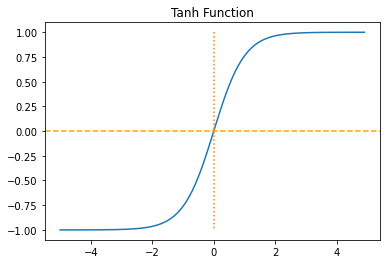

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 값을 출력할 때는 시그모이드 함수와 같은 문제가 발생하지만,  
시그모이드 함수와 달리 중심을 0으로 하고 있어 반환값의 변환폭이 커 기울기 소실 증상이 덜 발생  

#### 렐루 함수

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환

Text(0.5, 1.0, 'Relu Function')

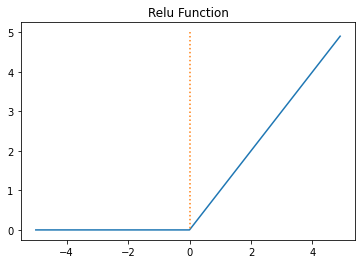

In [5]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 돼 뉴런이 다시 회생하는 것이 매우 어렵움  
이 문제를 죽은 렐루(dying ReLU)라고 함

#### 리키 렐루


죽은 렐루를 보완하기 위해 ReLU의 변형 함수로  
Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환

Text(0.5, 1.0, 'Leaky ReLU Function')

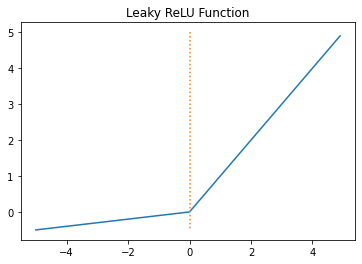

In [8]:
a = 0.1 # 시각화를 위해 0.1로 설정

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,-0.5], ':')
plt.title('Leaky ReLU Function')

#### 소프트맥스 함수

은닉층에선 잘 사용하지 않지만 다중 클래스 분류 문제에서 출력층으로 쓰임  

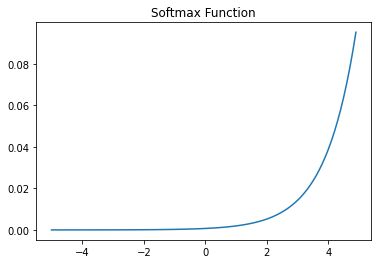

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

#### 출력층의 활성화 함수와 오차 함수의 관계

문제|활성화 함수|비용 함수
---|-----|-----
이진 분류|시그모이드|nn.BCELoss()
다중 클래스 분류|소프트맥스|nn.CrossEntropyLoss()
회귀|없음|MSE

### 다층 퍼셉트론으로 손글씨 분류하기

#### 숫자 필기 데이터 소개

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [11]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [12]:
print(digits.target[0])

0


In [13]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


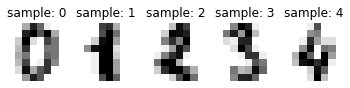

In [5]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i'%label)

In [15]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [17]:
print(digits.data[0], digits.data[0].shape) # 64차원의 벡터

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] (64,)


In [6]:
X = digits.data
Y = digits.target

#### 다층 퍼셉트론 분류기 만들기

In [7]:
import torch
import torch.nn as nn
from torch import optim

In [8]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [9]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [10]:
loss_fn = nn.CrossEntropyLoss()

In [11]:
optimizer = optim.Adam(model.parameters())

In [12]:
losses = []

In [13]:
for epoch in range(101):
    optimizer.zero_grad()
    
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
    losses.append(loss.item())

Epoch    0/100 Cost: 2.640578
Epoch   10/100 Cost: 2.195706
Epoch   20/100 Cost: 1.998313
Epoch   30/100 Cost: 1.739478
Epoch   40/100 Cost: 1.406881
Epoch   50/100 Cost: 1.037092
Epoch   60/100 Cost: 0.710723
Epoch   70/100 Cost: 0.489502
Epoch   80/100 Cost: 0.354301
Epoch   90/100 Cost: 0.272669
Epoch  100/100 Cost: 0.220757


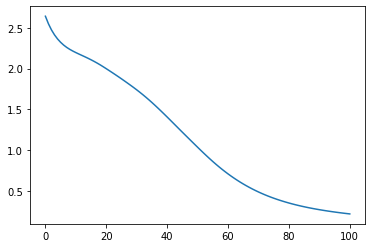

In [14]:
plt.plot(losses)

### 다층 퍼셉트론으로 MNIST 분류하기

In [15]:
import torch
import torch.nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [17]:
training_epochs = 15
batch_size = 100

In [18]:
mnist_train = dsets.MNIST(
    root='MNIST_data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

mnist_test = dsets.MNIST(
    root='MNIST_data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [19]:
data_loader = torch.utils.data.DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

In [22]:
model = nn.Sequential(
    nn.Linear(784, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
).to(device)

In [23]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [24]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [27]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)
        X = X.view(-1, 784)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print('Epoch: {:>4} Cost: {:>.9}'.format(
        epoch + 1, avg_cost
    ))

Epoch:    1 Cost: 1.09028435
Epoch:    2 Cost: 0.899657071
Epoch:    3 Cost: 0.924551725
Epoch:    4 Cost: 0.942180157
Epoch:    5 Cost: 1.01034331
Epoch:    6 Cost: 0.909479797
Epoch:    7 Cost: 1.15739512
Epoch:    8 Cost: 1.32151878
Epoch:    9 Cost: 1.28681803
Epoch:   10 Cost: 1.25282884
Epoch:   11 Cost: 1.28271079
Epoch:   12 Cost: 1.26950014
Epoch:   13 Cost: 1.27801716
Epoch:   14 Cost: 1.2751869
Epoch:   15 Cost: 1.2514044


In [32]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.4594999849796295


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### 과적합(Overfitting)을 막는 방법들

####  데이터의 양을 늘리기
데이터 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 암기  
데이터 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습해 과적합을 방지

#### 모델의 복잡도 줄이기
모델의 은닉층의 수나 매개변수의 수를 줄이기

#### 가중치 규제 적용하기
- L1 규제 : 가중치 W들의 절대값 합계를 비용 함수에 추가 (L1 노름)
- L2 규제 : 모든 가중치 W들의 제곱합을 비용 함수에 추가 (L2 노름)

#### 드롭아웃
드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법

 ### 기울기 소실과 폭주
- **기울기 소실(Gradient Vanishing)** : 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상
- **기울기 폭주(Gradient Exploding)** : 역전파 과정에서 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산하는 현상

#### ReLU와 ReLU의 변형들
시그모이드 함수를 은닉층에 사용하지 않고 ReLU와 ReLU 변형의 활성화 함수 사용

#### 가중치 초기화
- **세이비어 초기화** :  여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막음. 이 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태의 활성화 함수와 사용할 때 좋은 성능을 냄
- **He 초기화** : ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적

#### 배치 정규화
- **내부 공변량 변화** : 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상
- **배치 정규화** : 한 번에 들어오는 배치 단위로 정규화하는 것
- **배치 정규화의 한계** : 미니 배치 크기에 의존적, RNN에 적용하기 힘듦

#### 층 정규화
샘플 수가 n개 특성 개수가 m이라 할 때  
배치 정규화의 경우  
n개의 샘플을 각 특성 별로 정규화를 진행  
col별로 정규화  

층 정규화의 경우  
각 샘플에 속하는 값들끼리 정규화를 진행  
row별로 정규화  